In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

from sklearn.neural_network import MLPClassifier

## Reuse Datasets from Assignment 1
### Dataset 1: UCI Mushroom Data Set: https://archive.ics.uci.edu/ml/datasets/mushroom
### Dataset 2: Breast cancer dataset from sklearn

In [4]:
## Dataset 1
## UCI Mushroom Data Set: https://archive.ics.uci.edu/ml/datasets/mushroom
# read data file
names = ["label",
"cap-shape",
"cap-surface",
"cap-color",
"bruises?",
"odor",
"gill-attachment",
"gill-spacing",
"gill-size",
"gill-color",
"stalk-shape",
"stalk-root",
"stalk-surface-above-ring",
"stalk-surface-below-ring",
"stalk-color-above-ring",
"stalk-color-below-ring",
"veil-type",
"veil-color",
"ring-number",
"ring-type",
"spore-print-color",
"population"]
data_1 = pd.read_csv('agaricus_lepiota_data.csv',  index_col = False, names = names)
data_1 = data_1.astype('category') 
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for column in data_1.columns:
    data_1[column] = labelencoder.fit_transform(data_1[column])
# veil_type only have one single value, droppping it won't affect the classification result.
data_1 = data_1.drop(["veil-type"],axis=1)
label_1,data_1 = data_1["label"].values,data_1.drop(["label"], axis=1).values

# Dataset 2
# Breast cancer dataset from sklearn
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
data_2, label_2 = cancer.data, cancer.target

In [25]:
print(data_1.shape, data_2.shape)

(8124, 20) (569, 30)


## Dimensionality Reduction Algorithms
### PCA, ICA, Randomized Projections, NMF

In [7]:
# Dimensionality reduction algorithms
# PCA, ICA, Randomized Projections, and NMF(chosen)  
# hyper parameters: n_components, chosen from a list of [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
from sklearn.decomposition import PCA
# X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
# pca = PCA(n_components=2)
# pca.fit(X)

from sklearn.decomposition import FastICA
# transformer = FastICA(n_components=7,random_state=0,whiten='unit-variance')
# X_transformed = transformer.fit_transform(X)

from sklearn import random_projection
# transformer = random_projection.GaussianRandomProjection(n_components = 7)
# X_new = transformer.fit_transform(X)

from sklearn.decomposition import NMF
# model = NMF(n_components=2, init='random', random_state=0)
# W = model.fit_transform(X)
# H = model.components_

## Clustering Algorithms
### K-means and EM

In [9]:
# hyper parameters, n_clusters 
from sklearn.cluster import KMeans
# km = KMeans(
#     n_clusters=3, init='random',
#     n_init=10, max_iter=300, 
#     tol=1e-04, random_state=0
# )
# y_km = km.fit_predict(X)

# hyper parameters, n_components
from sklearn.mixture import GaussianMixture
# gmm = GMM(n_components=4).fit(X)
# labels = gmm.predict(X)
# plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

## TASK 1 Run the clustering algorithms on the datasets and describe what you see.

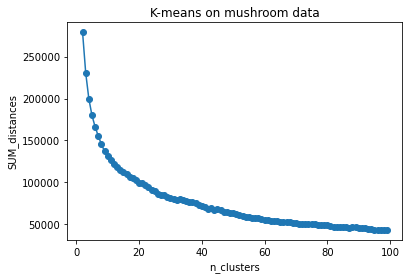

In [26]:
## TASK 1 Run the clustering algorithms on the datasets and describe what you see.
# K-maeans on mushroom data
scores = []
for num in range(2,100):
    km = KMeans(
    n_clusters=num, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
    )
    km.fit(data_1)
    scores.append(km.inertia_)
#     print(km.labels_)
# scores
plt.plot(range(2, 100), scores, marker='o')
plt.title('K-means on mushroom data')
plt.xlabel('n_clusters')
plt.ylabel('SUM_distances')
plt.show()

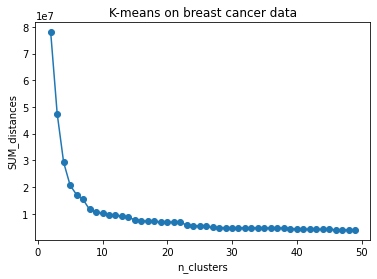

In [29]:
# K-maeans on breast cancer data
scores = []
for num in range(2,50):
    km = KMeans(
    n_clusters=num, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
    )
    km.fit(data_2)
    scores.append(km.inertia_)
#     print(km.labels_)
# scores
plt.plot(range(2, 50), scores, marker='o')
plt.title('K-means on breast cancer data')
plt.xlabel('n_clusters')
plt.ylabel('SUM_distances')
plt.show()

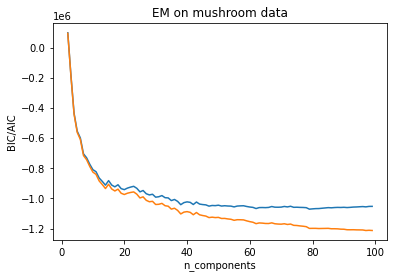

In [35]:
# The optimal number of clusters is the value that minimizes the AIC or BIC, 
# In this case, n = 60 for mushroom data
# EM on mushroom data
BIC = []
AIC = []
for num in range(2,100):
    em = GaussianMixture(
        n_components=num,
        n_init=10, max_iter=300, 
        tol=1e-04, random_state=0
        )
    em.fit(data_1)
    BIC.append(em.bic(data_1))
    AIC.append(em.aic(data_1))
plt.plot(range(2, 100), BIC,  label='BIC')
plt.plot(range(2, 100), AIC, label='AIC')
plt.title('EM on mushroom data')
plt.xlabel('n_components')
plt.ylabel('BIC/AIC')
plt.show()    

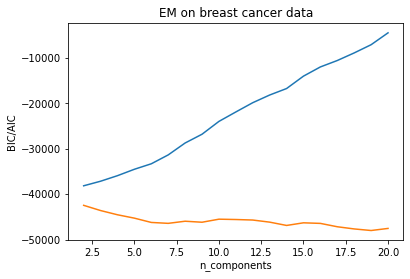

In [40]:
# EM on breast cancer data, 
# The optimal number of clusters is the value that minimizes the AIC or BIC, 
# In this case, n = 7 for breast cancer data
BIC = []
AIC = []
for num in range(2,21):
    em = GaussianMixture(
        n_components=num,
 random_state=0
        )
    em.fit(data_2)
    BIC.append(em.bic(data_2))
    AIC.append(em.aic(data_2))
plt.plot(range(2, 21), BIC, label='BIC')
plt.plot(range(2, 21), AIC, label='AIC')
plt.title('EM on breast cancer data')
plt.xlabel('n_components')
plt.ylabel('BIC/AIC')
plt.show()   

## TASK 2 Apply the dimensionality reduction algorithms to the two datasets and describe what you see.

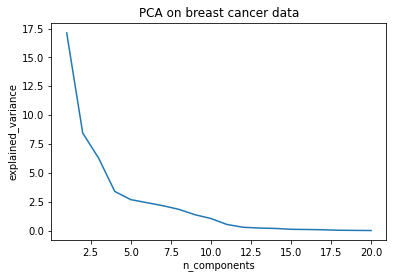

In [52]:
## mushroom data , the stadard is to expalin 90% of the variance
transformer_pca = PCA(n_components= 20, random_state=0)
data_1_pca = transformer_pca.fit(data_1)
plt.plot(range(1, 21),transformer_pca.explained_variance_)
plt.title('PCA on breast cancer data')
plt.xlabel('n_components')
plt.ylabel('explained_variance')
plt.show()      
    
#     # ICA + mushroom
#     transformer_ica = FastICA(n_components=num,random_state=0
# #                               ,whiten='unit-variance'
#                              )
#     data_1_ica = transformer_ica.fit_transform(data_1)
    
#     # Randomized Projections + mushroom
#     transformer_rp = random_projection.GaussianRandomProjection(n_components = num, random_state=0)
#     data_1_rp = transformer_rp.fit_transform(data_1)
    
#     # NMF + mushroom
#     transformer_nmf = NMF(n_components=num, init='random', random_state=0)
#     data_1_nmf = transformer_nmf.fit_transform(data_1)

In [95]:
# 8 components could explain 90% of the variance
# PCA+mushroom
transformer_pca = PCA(n_components= 0.9, random_state=0)
data_1_pca_ = transformer_pca.fit_transform(data_1)
print('mushroom data')
print('PCA 90% of variance explained: ' + str(transformer_pca.n_components_))

       
# ICA + mushroom
transformer_ica = FastICA(n_components=10, random_state=0,  whiten='unit-variance')
data_1_ica_ = transformer_ica.fit_transform(data_1)
print('ICA n_components: ' + str(10))

      
# Randomized Projections + mushroom
transformer_rp = random_projection.GaussianRandomProjection(n_components= 10, random_state=0)
data_1_rp_ = transformer_rp.fit_transform(data_1)
print('RP n_components: ' + str(transformer_rp.n_components_))
      
# NMF + mushroom
transformer_nmf = NMF(n_components= 10, init='random', max_iter=10000, random_state=0)
data_1_nmf_ = transformer_nmf.fit_transform(data_1)
print('NMF n_components: ' + str(transformer_nmf.n_components_))
      

PCA 90% of variance explained: 8
ICA n_components: 10
RP n_components: 10
NMF n_components: 10


In [99]:
data_1_pca = transformer_pca.transform(data_1)
data_1_ica = transformer_ica.transform(data_1)
data_1_rp = transformer_rp.transform(data_1)
data_1_nmf = transformer_nmf.transform(data_1)

In [104]:
# 1 components could explain 90% of the variance
# PCA+cancer
transformer_pca = PCA(n_components= 0.9, random_state=0)
data_2_pca_ = transformer_pca.fit_transform(data_2)
print('breast cancer data')
print('PCA 90% of variance explained: ' + str(transformer_pca.n_components_))

       
# ICA + cancer
transformer_ica = FastICA(n_components=5, random_state=0,  whiten='unit-variance')
data_2_ica_ = transformer_ica.fit_transform(data_2)
print('ICA n_components: ' + str(5))

      
# Randomized Projections + cancer
transformer_rp = random_projection.GaussianRandomProjection(n_components= 5, random_state=0)
data_2_rp_ = transformer_rp.fit_transform(data_2)
print('RP n_components: ' + str(transformer_rp.n_components_))
      
# NMF + cancer
transformer_nmf = NMF(n_components= 5, init='random', max_iter=10000, random_state=0)
data_2_nmf_ = transformer_nmf.fit_transform(data_2)
print('NMF n_components: ' + str(transformer_nmf.n_components_))
      

breast cancer data
PCA 90% of variance explained: 1
ICA n_components: 5
RP n_components: 5
NMF n_components: 5


In [105]:
data_2_pca = transformer_pca.transform(data_2)
data_2_ica = transformer_ica.transform(data_2)
data_2_rp = transformer_rp.transform(data_2)
data_2_nmf = transformer_nmf.transform(data_2)

## TASK 3 RUN clustering algorithms on data after dimension reduction. 16 combinations
### K-means on mushroom data , n_clusters= 80
### EM on mushroom data, n_components = 60
### K-means on mushroom data , n_clusters= 25
### EM on cancer data , n_components= 7


In [ ]:
# data_1_pca = transformer_pca.transform(data_1)
# data_1_ica = transformer_ica.transform(data_1)
# data_1_rp = transformer_rp.transform(data_1)
# data_1_nmf = transformer_nmf.transform(data_1)
# data_2_pca = transformer_pca.transform(data_2)
# data_2_ica = transformer_ica.transform(data_2)
# data_2_rp = transformer_rp.transform(data_2)
# data_2_nmf = transformer_nmf.transform(data_2)

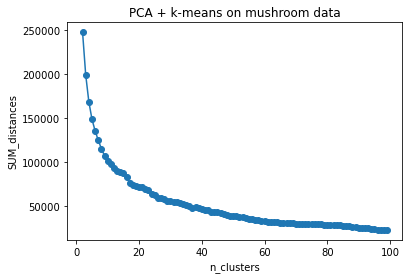

In [106]:
# 1. mushroom data + PCA + k-means
scores = []
for num in range(2,100):
    km = KMeans(
    n_clusters=num, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
    )
    km.fit(data_1_pca)
    scores.append(km.inertia_)
#     print(km.labels_)
# scores
plt.plot(range(2, 100), scores, marker='o')
plt.title('PCA + k-means on mushroom data')
plt.xlabel('n_clusters')
plt.ylabel('SUM_distances')
plt.show()

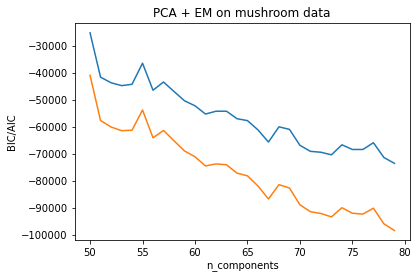

In [114]:
# 2. mushroom data + PCA + EM
BIC = []
AIC = []
for num in range(50,80):
    em = GaussianMixture(
        n_components=num,
        n_init=10, max_iter=300, 
        tol=1e-04, random_state=0
        )
    em.fit(data_1_pca)
    BIC.append(em.bic(data_1_pca))
    AIC.append(em.aic(data_1_pca))
plt.plot(range(50,80), BIC,label='BIC')
plt.plot(range(50,80), AIC, label='AIC')
plt.title('PCA + EM on mushroom data')
plt.xlabel('n_components')
plt.ylabel('BIC/AIC')
plt.show()   

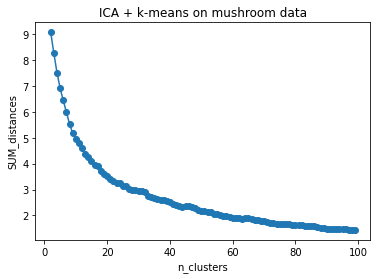

In [107]:
# 3. mushroom data + ICA + k-means
scores = []
for num in range(2,100):
    km = KMeans(
    n_clusters=num, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
    )
    km.fit(data_1_ica)
    scores.append(km.inertia_)
#     print(km.labels_)
# scores
plt.plot(range(2, 100), scores, marker='o')
plt.title('ICA + k-means on mushroom data')
plt.xlabel('n_clusters')
plt.ylabel('SUM_distances')
plt.show()

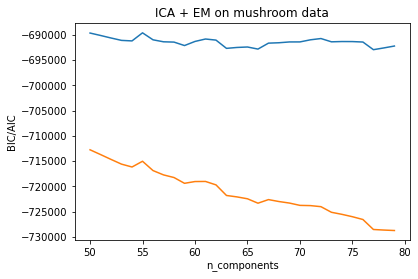

In [115]:
# 4. mushroom data + ICA + EM
BIC = []
AIC = []
for num in range(50,80):
    em = GaussianMixture(
        n_components=num,
        n_init=10, max_iter=300, 
        tol=1e-04, random_state=0
        )
    em.fit(data_1_ica)
    BIC.append(em.bic(data_1_ica))
    AIC.append(em.aic(data_1_ica))
plt.plot(range(50,80), BIC,label='BIC')
plt.plot(range(50,80), AIC, label='AIC')
plt.title('ICA + EM on mushroom data')
plt.xlabel('n_components')
plt.ylabel('BIC/AIC')
plt.show()  

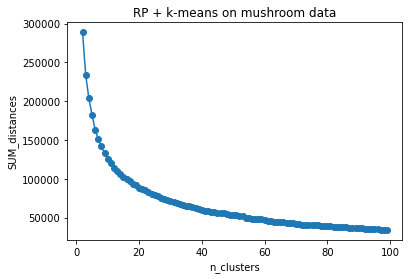

In [108]:
# 5. mushroom data + RP + k-means
scores = []
for num in range(2,100):
    km = KMeans(
    n_clusters=num, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
    )
    km.fit(data_1_rp)
    scores.append(km.inertia_)
#     print(km.labels_)
# scores
plt.plot(range(2, 100), scores, marker='o')
plt.title('RP + k-means on mushroom data')
plt.xlabel('n_clusters')
plt.ylabel('SUM_distances')
plt.show()

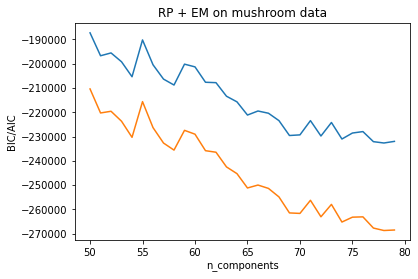

In [116]:
# 6. mushroom data + RP + EM
BIC = []
AIC = []
for num in range(50,80):
    em = GaussianMixture(
        n_components=num,
        n_init=10, max_iter=300, 
        tol=1e-04, random_state=0
        )
    em.fit(data_1_rp)
    BIC.append(em.bic(data_1_rp))
    AIC.append(em.aic(data_1_rp))
plt.plot(range(50,80), BIC,label='BIC')
plt.plot(range(50,80), AIC, label='AIC')
plt.title('RP + EM on mushroom data')
plt.xlabel('n_components')
plt.ylabel('BIC/AIC')
plt.show()  

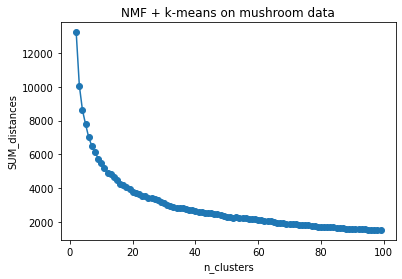

In [109]:
# 7. mushroom data + NMF + k-means
scores = []
for num in range(2,100):
    km = KMeans(
    n_clusters=num, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
    )
    km.fit(data_1_nmf)
    scores.append(km.inertia_)
#     print(km.labels_)
# scores
plt.plot(range(2, 100), scores, marker='o')
plt.title('NMF + k-means on mushroom data')
plt.xlabel('n_clusters')
plt.ylabel('SUM_distances')
plt.show()

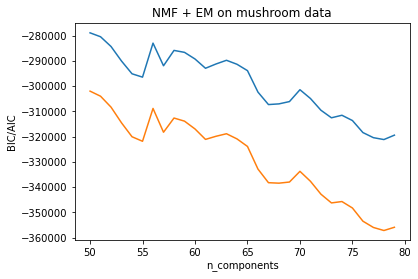

In [117]:
# 8. mushroom data + NMF + EM
BIC = []
AIC = []
for num in range(50,80):
    em = GaussianMixture(
        n_components=num,
        n_init=10, max_iter=300, 
        tol=1e-04, random_state=0
        )
    em.fit(data_1_nmf)
    BIC.append(em.bic(data_1_nmf))
    AIC.append(em.aic(data_1_nmf))
plt.plot(range(50,80), BIC,label='BIC')
plt.plot(range(50,80), AIC, label='AIC')
plt.title('NMF + EM on mushroom data')
plt.xlabel('n_components')
plt.ylabel('BIC/AIC')
plt.show()  

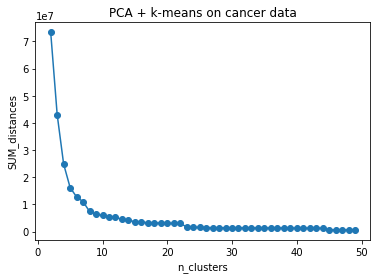

In [110]:
# 9. cancer data + PCA + k-means
scores = []
for num in range(2,50):
    km = KMeans(
    n_clusters=num, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
    )
    km.fit(data_2_pca)
    scores.append(km.inertia_)
#     print(km.labels_)
# scores
plt.plot(range(2, 50), scores, marker='o')
plt.title('PCA + k-means on cancer data')
plt.xlabel('n_clusters')
plt.ylabel('SUM_distances')
plt.show()

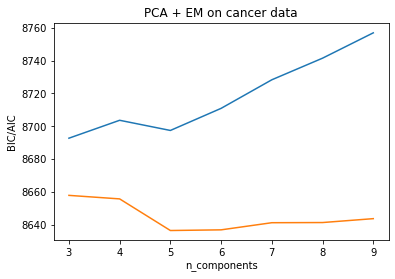

In [118]:
# 10. cancer data + PCA + EM
BIC = []
AIC = []
for num in range(3,10):
    em = GaussianMixture(
        n_components=num,
        n_init=10, max_iter=300, 
        tol=1e-04, random_state=0
        )
    em.fit(data_2_pca)
    BIC.append(em.bic(data_2_pca))
    AIC.append(em.aic(data_2_pca))
plt.plot(range(3,10), BIC,label='BIC')
plt.plot(range(3,10), AIC, label='AIC')
plt.title('PCA + EM on cancer data')
plt.xlabel('n_components')
plt.ylabel('BIC/AIC')
plt.show()

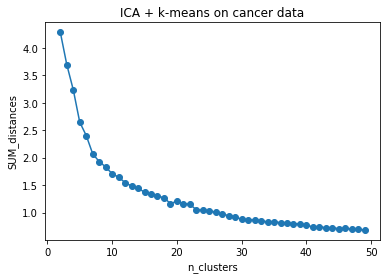

In [111]:
# 11. cancer data + ICA + k-means
scores = []
for num in range(2,50):
    km = KMeans(
    n_clusters=num, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
    )
    km.fit(data_2_ica)
    scores.append(km.inertia_)
#     print(km.labels_)
# scores
plt.plot(range(2, 50), scores, marker='o')
plt.title('ICA + k-means on cancer data')
plt.xlabel('n_clusters')
plt.ylabel('SUM_distances')
plt.show()

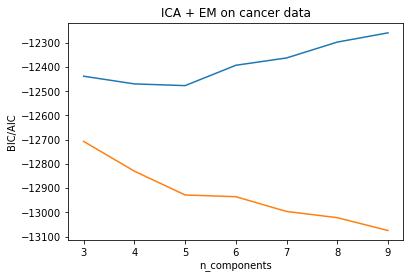

In [119]:
# 12. cancer data + ICA + EM
BIC = []
AIC = []
for num in range(3,10):
    em = GaussianMixture(
        n_components=num,
        n_init=10, max_iter=300, 
        tol=1e-04, random_state=0
        )
    em.fit(data_2_ica)
    BIC.append(em.bic(data_2_ica))
    AIC.append(em.aic(data_2_ica))
plt.plot(range(3,10), BIC,label='BIC')
plt.plot(range(3,10), AIC, label='AIC')
plt.title('ICA + EM on cancer data')
plt.xlabel('n_components')
plt.ylabel('BIC/AIC')
plt.show()

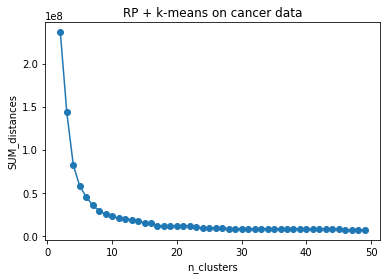

In [112]:
# 13. cancer data + RP + k-means
scores = []
for num in range(2,50):
    km = KMeans(
    n_clusters=num, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
    )
    km.fit(data_2_rp)
    scores.append(km.inertia_)
#     print(km.labels_)
# scores
plt.plot(range(2, 50), scores, marker='o')
plt.title('RP + k-means on cancer data')
plt.xlabel('n_clusters')
plt.ylabel('SUM_distances')
plt.show()

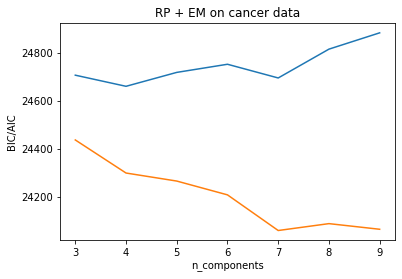

In [120]:
# 14. cancer data + RP + EM
BIC = []
AIC = []
for num in range(3,10):
    em = GaussianMixture(
        n_components=num,
        n_init=10, max_iter=300, 
        tol=1e-04, random_state=0
        )
    em.fit(data_2_rp)
    BIC.append(em.bic(data_2_rp))
    AIC.append(em.aic(data_2_rp))
plt.plot(range(3,10), BIC,label='BIC')
plt.plot(range(3,10), AIC, label='AIC')
plt.title('RP + EM on cancer data')
plt.xlabel('n_components')
plt.ylabel('BIC/AIC')
plt.show()

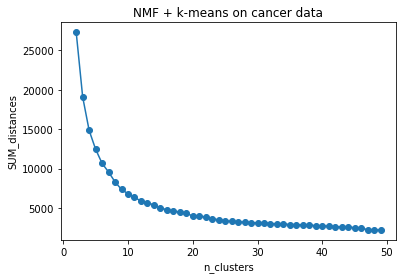

In [113]:
# 15. cancer data + NMF + k-means
scores = []
for num in range(2,50):
    km = KMeans(
    n_clusters=num, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
    )
    km.fit(data_2_nmf)
    scores.append(km.inertia_)
#     print(km.labels_)
# scores
plt.plot(range(2, 50), scores, marker='o')
plt.title('NMF + k-means on cancer data')
plt.xlabel('n_clusters')
plt.ylabel('SUM_distances')
plt.show()

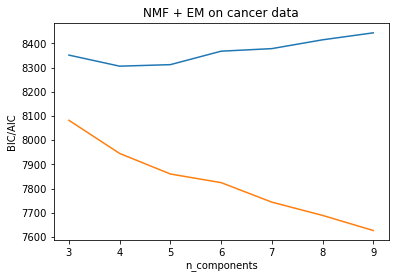

In [121]:
# 16. cancer data + NMF + EM
BIC = []
AIC = []
for num in range(3,10):
    em = GaussianMixture(
        n_components=num,
        n_init=10, max_iter=300, 
        tol=1e-04, random_state=0
        )
    em.fit(data_2_nmf)
    BIC.append(em.bic(data_2_nmf))
    AIC.append(em.aic(data_2_nmf))
plt.plot(range(3,10), BIC,label='BIC')
plt.plot(range(3,10), AIC, label='AIC')
plt.title('NMF + EM on cancer data')
plt.xlabel('n_components')
plt.ylabel('BIC/AIC')
plt.show()

## TASK 4  choose one dataset .dimensionality recuction + neural networks
### here choose the breast cancer dataset, since dimensionality reduction performs better on this data set


In [ ]:
# data_2_pca = transformer_pca.transform(data_2)
# data_2_ica = transformer_ica.transform(data_2)
# data_2_rp = transformer_rp.transform(data_2)
# data_2_nmf = transformer_nmf.transform(data_2)

In [131]:
# split data into train test parts
# data_2_pca, label_2 
from sklearn.model_selection import train_test_split
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(data_2_pca,label_2,random_state=42,test_size=0.2)
X_train_ica, X_test_ica, y_train_ica, y_test_ica = train_test_split(data_2_ica,label_2,random_state=42,test_size=0.2)
X_train_rp, X_test_rp, y_train_rp, y_test_rp = train_test_split(data_2_rp,label_2,random_state=42,test_size=0.2)
X_train_nmf, X_test_nmf, y_train_nmf, y_test_nmf = train_test_split(data_2_nmf,label_2,random_state=42,test_size=0.2)

In [141]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

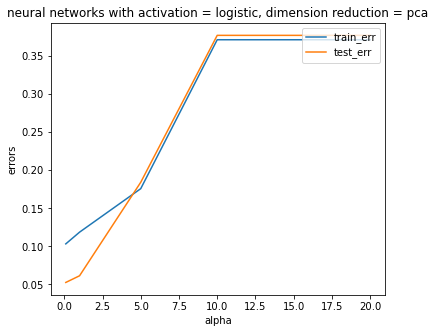

In [142]:
#PCA + neural networks
alpha_lst = [20, 10, 5, 1, 0.1]
max_iter = 1000
train_err_nn = np.empty(5)
test_err_nn = np.empty(5)

plt.figure(figsize=(6, 5))
for j, alpha in enumerate(alpha_lst):
    learner = make_pipeline(StandardScaler(), MLPClassifier(activation='logistic', alpha = alpha, max_iter = max_iter))
    learner.fit(X_train_pca, y_train_pca)
    train_score = learner.score(X_train_pca, y_train_pca)
    test_score = learner.score(X_test_pca, y_test_pca)
    train_err_nn[j] = 1-train_score
    test_err_nn[j] = 1-test_score
#     print('neural networks:',activation,alpha, max_iter, train_score, test_score)
plt.plot(alpha_lst,train_err_nn, label = 'train_err')
plt.plot(alpha_lst,test_err_nn, label = 'test_err')
plt.xlabel('alpha')
plt.ylabel('errors')
plt.legend(loc="upper right")
plt.title('neural networks with activation = logistic, dimension reduction = pca')
plt.plot()
# print(train_err_nn)
# print(test_err_nn)
plt.show()

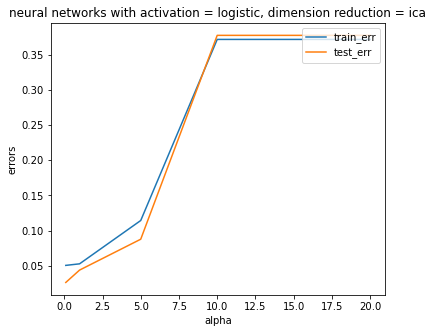

In [138]:
#ICA + neural networks
alpha_lst = [20, 10, 5, 1, 0.1]
max_iter = 1000
train_err_nn = np.empty(5)
test_err_nn = np.empty(5)

plt.figure(figsize=(6, 5))
for j, alpha in enumerate(alpha_lst):
    learner = make_pipeline(StandardScaler(), MLPClassifier(activation='logistic', alpha = alpha, max_iter = max_iter))
    learner.fit(X_train_ica, y_train_ica)
    train_score = learner.score(X_train_ica, y_train_ica)
    test_score = learner.score(X_test_ica, y_test_ica)
    train_err_nn[j] = 1-train_score
    test_err_nn[j] = 1-test_score
#     print('neural networks:',activation,alpha, max_iter, train_score, test_score)
plt.plot(alpha_lst,train_err_nn, label = 'train_err')
plt.plot(alpha_lst,test_err_nn, label = 'test_err')
plt.xlabel('alpha')
plt.ylabel('errors')
plt.legend(loc="upper right")
plt.title('neural networks with activation = logistic, dimension reduction = ica')
plt.plot()
# print(train_err_nn)
# print(test_err_nn)
plt.show()

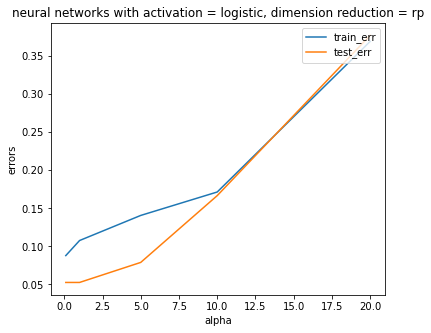

In [139]:
#rp + neural networks
alpha_lst = [20, 10, 5, 1, 0.1]
max_iter = 1000
train_err_nn = np.empty(5)
test_err_nn = np.empty(5)

plt.figure(figsize=(6, 5))
for j, alpha in enumerate(alpha_lst):
    learner = make_pipeline(StandardScaler(), MLPClassifier(activation='logistic', alpha = alpha, max_iter = max_iter))
    learner.fit(X_train_rp, y_train_rp)
    train_score = learner.score(X_train_rp, y_train_rp)
    test_score = learner.score(X_test_rp, y_test_rp)
    train_err_nn[j] = 1-train_score
    test_err_nn[j] = 1-test_score
#     print('neural networks:',activation,alpha, max_iter, train_score, test_score)
plt.plot(alpha_lst,train_err_nn, label = 'train_err')
plt.plot(alpha_lst,test_err_nn, label = 'test_err')
plt.xlabel('alpha')
plt.ylabel('errors')
plt.legend(loc="upper right")
plt.title('neural networks with activation = logistic, dimension reduction = rp')
plt.plot()
# print(train_err_nn)
# print(test_err_nn)
plt.show()

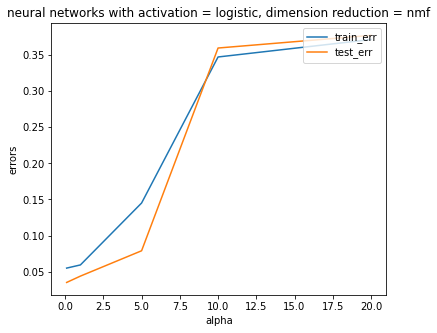

In [140]:
#nmf + neural networks
alpha_lst = [20, 10, 5, 1, 0.1]
max_iter = 1000
train_err_nn = np.empty(5)
test_err_nn = np.empty(5)

plt.figure(figsize=(6, 5))
for j, alpha in enumerate(alpha_lst):
    learner = make_pipeline(StandardScaler(), MLPClassifier(activation='logistic', alpha = alpha, max_iter = max_iter))
    learner.fit(X_train_nmf, y_train_nmf)
    train_score = learner.score(X_train_nmf, y_train_nmf)
    test_score = learner.score(X_test_nmf, y_test_nmf)
    train_err_nn[j] = 1-train_score
    test_err_nn[j] = 1-test_score
#     print('neural networks:',activation,alpha, max_iter, train_score, test_score)
plt.plot(alpha_lst,train_err_nn, label = 'train_err')
plt.plot(alpha_lst,test_err_nn, label = 'test_err')
plt.xlabel('alpha')
plt.ylabel('errors')
plt.legend(loc="upper right")
plt.title('neural networks with activation = logistic, dimension reduction = nmf')
plt.plot()
# print(train_err_nn)
# print(test_err_nn)
plt.show()

## TASK 5  choose one data set. dimensionality recuction + clustering + neural networks

In [ ]:
# clustering results
# cancer data + PCA + k-means + nn
data_2_pca

# cancer data + ICA + k-means + nn
# cancer data + rp + k-means + nn 
# cancer data + NMF + k-means + nn 

In [ ]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(data_2_pca,label_2,random_state=42,test_size=0.2)
X_train_ica, X_test_ica, y_train_ica, y_test_ica = train_test_split(data_2_ica,label_2,random_state=42,test_size=0.2)
X_train_rp, X_test_rp, y_train_rp, y_test_rp = train_test_split(data_2_rp,label_2,random_state=42,test_size=0.2)
X_train_nmf, X_test_nmf, y_train_nmf, y_test_nmf = train_test_split(data_2_nmf,label_2,random_state=42,test_size=0.2)

In [ ]:
# clustering results: 


In [ ]:
## 
# PCA + mushroom
# PCA + breast cancer
for num in range(1, 21): 
    transformer_pca = PCA(n_components=num, random_state=0)
    data_1_pca = transformer_pca.fit(data_1)

for num in range(1, 31):
    transformer_pca = PCA(n_components=num, random_state=0)
    data_2_pca = transformer_pca.fit(data_2)

In [ ]:
## ICA
# ICA + mushroom
# ICA + breast cancer
for num in range(1, 21): 
    transformer_ica = FastICA(n_components=num,random_state=0
#                               ,whiten='unit-variance'
                             )
    data_1_ica = transformer_ica.fit_transform(data_1)
    
for num in range(1, 31): 
    transformer_ica = FastICA(n_components=num,random_state=0
#                                   ,whiten='unit-variance'
                                 )
    data_2_ica = transformer_ica.fit_transform(data_2)

In [ ]:
## Randomized Projections
# Randomized Projections + mushroom
# Randomized Projections + breast cancer
for num in range(1, 21): 
    transformer_rp = random_projection.GaussianRandomProjection(n_components = num, random_state=0)
    data_1_rp = transformer_rp.fit_transform(data_1)
# X_new = transformer.fit_transform(X)

for num in range(1, 31): 
    transformer_rp = random_projection.GaussianRandomProjection(n_components = num, random_state=0)
    data_2_rp = transformer_rp.fit_transform(data_2)

In [ ]:
## NMF 
# NMF + mushroom
# NMF + breast cancer
for num in range(1, 21): 
    transformer_nmf = NMF(n_components=num, init='random', random_state=0)
    data_1_nmf = transformer_nmf.fit_transform(data_1)

for num in range(1, 31): 
    transformer_nmf = NMF(n_components=num, init='random', random_state=0)
    data_2_nmf = transformer_nmf.fit_transform(data_2)